In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = '/Users/pcp25/Downloads/CityStreet_dataset'
root = 'C:\\Users\\pcp25\\Downloads\\CityStreet_dataset'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root, 'train','image')
part_A_test = os.path.join(root, 'test','image')
print(root, part_A_test)
path_sets = [part_A_test]

C:\Users\pcp25\Downloads\CityStreet_dataset C:\Users\pcp25\Downloads\CityStreet_dataset\test\image


In [5]:
img_paths = []
for path in path_sets:
    print(path)
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

C:\Users\pcp25\Downloads\CityStreet_dataset\test\image


In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [8]:
#loading the trained weights
checkpoint = torch.load('0model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [10]:
print(len(img_paths))

200


In [36]:
mae = 0
for i in range(len(img_paths)):
    #img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    #img[0,:,:]=img[0,:,:]-92.8207477031
    #img[1,:,:]=img[1,:,:]-95.2757037428
    #img[2,:,:]=img[2,:,:]-104.877445883
    #img = img.cuda()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('image','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density_maps'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print (mae/len(img_paths))

0 11.170425415039062
1 16.870468139648438
2 26.029335021972656
3 26.191619873046875
4 32.785423278808594
5 36.773780822753906
6 44.803741455078125
7 58.64039611816406
8 74.80490493774414
9 86.16400146484375
10 103.91181945800781
11 118.1952018737793
12 131.8177146911621
13 146.92998886108398
14 157.34228897094727
15 166.60038375854492
16 176.38825607299805
17 186.33811569213867
18 197.35396194458008
19 200.49745559692383
20 214.63654708862305
21 222.29922103881836
22 231.23480224609375
23 235.28587341308594
24 244.35391235351562
25 246.60965728759766
26 249.49549865722656
27 250.52305603027344
28 251.5433578491211
29 255.31327056884766
30 256.45228576660156
31 262.89864349365234
32 271.5514678955078
33 286.6017837524414
34 303.9354705810547
35 326.92699432373047
36 347.23863220214844
37 365.4546813964844
38 376.0272750854492
39 394.05335998535156
40 407.03759765625
41 421.1851272583008
42 437.94091796875
43 456.9686279296875
44 460.2936096191406
45 477.4822998046875
46 488.155891418457

Predicted Count :  88


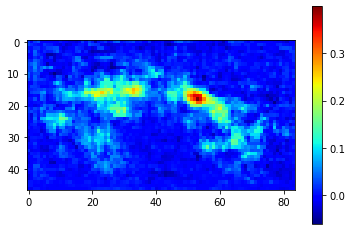

Original Count :  95


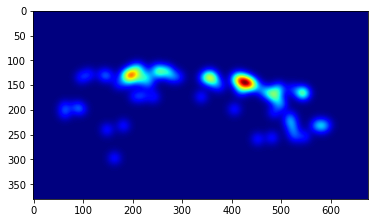

Original Image


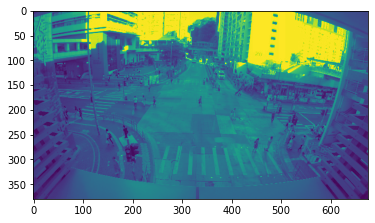

In [12]:
from matplotlib import cm as c
img = transform(Image.open('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_001.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.colorbar()
plt.show()
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_001.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_001.jpg'))
plt.show()

Predicted Count :  78


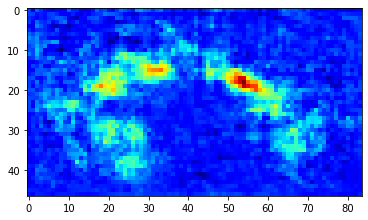

Original Count :  80


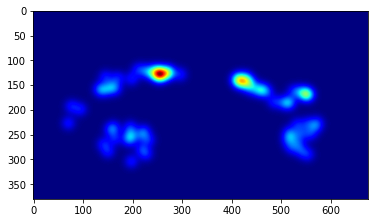

Original Image


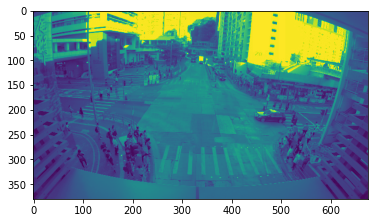

In [13]:
from matplotlib import cm as c
img = transform(Image.open('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_100.jpg'))
plt.show()

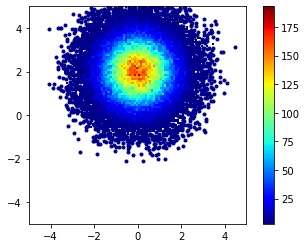

In [14]:
import matplotlib.pyplot as plt, numpy as np, numpy.random, scipy

#histogram definition
xyrange = [[-5,5],[-5,5]] # data range
bins = [100,100] # number of bins
thresh = 3  #density threshold

#data definition
N = 1e5;
xdat, ydat = np.random.normal(size=int(N)), np.random.normal(2, 1, size=int(N))

# histogram the data

hh, locx, locy = numpy.histogram2d(xdat, ydat, range=xyrange, bins=bins)
posx = np.digitize(xdat, locx)
posy = np.digitize(ydat, locy)

#select points within the histogram
ind = (posx > 0) & (posx <= bins[0]) & (posy > 0) & (posy <= bins[1])
hhsub = hh[posx[ind] - 1, posy[ind] - 1] # values of the histogram where the points are
xdat1 = xdat[ind][hhsub < thresh] # low density points
ydat1 = ydat[ind][hhsub < thresh]
hh[hh < thresh] = np.nan # fill the areas with low density by NaNs

plt.imshow(np.flipud(hh.T),cmap='jet',extent=np.array(xyrange).flatten(), interpolation='none', origin='upper')
plt.colorbar()   
plt.plot(xdat1, ydat1, '.',color='darkblue')
plt.show()

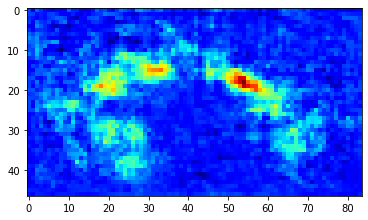

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))

plt.imshow(img,cmap = c.jet)
plt.savefig("threshold.jpeg")
plt.show()
thimg = cv2.imread("threshold.jpeg")
cv2.imshow("threshold.jpeg", thimg)
th3 = cv2.adaptiveThreshold(thimg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow(th3,cmap = c.jet)
plt.show()


In [ ]:
# dis_idx = 16 if dataset == 'B' else 0
# weights_dir_neo = 'weights_B_MSE_BCE_bestMAE7.846_Sat-May-18'
# model = model_from_json(open('models/{}.json'.format(net), 'r').read())
mae = 0
for i in range(len(img_paths)):
    if i % 199== 0:
        print('{}/{}'.format(i, len(img_paths)))
    i += 0
    ct_preds =[]
    ct_gts=[]
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('image','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density_maps'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    ct_pred = output.detach().cpu().sum().numpy()
    ct_gt = np.sum(groundtruth)
    ct_preds.append(ct_pred)
    ct_gts.append(ct_gt)
    plt.plot(ct_preds, 'r>')
    plt.plot(ct_gts, 'b+')
    plt.legend(['ct_preds', 'ct_gts'])
    plt.title('Predicted vs GT')
    error = np.array(ct_preds) - np.array(ct_gts)
    plt.plot(error)
    #print (i,mae)
print (mae/len(img_paths))
plt.show()


plt.title('Pred - GT, mean = {}, MAE={}'.format(
    (round((mae/len(img_paths)), 3)),
    (round(mae), 3)
))
plt.show()
idx_max_error = np.argsort(np.abs(error))[::-1]

img = transform(Image.open('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_199.jpg'))
plt.show()


In [ ]:
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
tempb = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_010.h5', 'r')
temp_2 = np.asarray(tempb['density_maps'])
tempc = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_050.h5', 'r')
temp_3 = np.asarray(tempb['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
plt.savefig("densitymap100.jpeg")
plt.show()
plt.imshow(temp_2,cmap = c.jet)
plt.savefig("densitymap010.jpeg")
plt.show()
plt.imshow(temp_3,cmap = c.jet)
plt.savefig("densitymap050.jpeg")
plt.show()


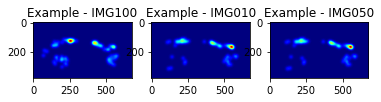

In [30]:
f, axarr = plt.subplots(nrows=1,ncols=3)
plt.sca(axarr[0]); 
plt.imshow(temp_1,cmap = c.jet); plt.title('Example - IMG100')
plt.sca(axarr[1]); 
plt.imshow(temp_2,cmap = c.jet); plt.title('Example - IMG010')
plt.sca(axarr[2]); 
plt.imshow(temp_3,cmap = c.jet); plt.title('Example - IMG050')
plt.savefig("densitymaps.jpeg")
plt.show()

In [31]:
mae = 0
for i in range(len(img_paths)):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('image','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density_maps'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

14.222013969421386


In [67]:
mae = 0
mae_list = []
for i in range(len(img_paths)):
    #img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    #img[0,:,:]=img[0,:,:]-92.8207477031
    #img[1,:,:]=img[1,:,:]-95.2757037428
    #img[2,:,:]=img[2,:,:]-104.877445883
    #img = img.cuda()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('image','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density_maps'])
    output = model(img.unsqueeze(0))
    mae = abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    mae_list.append(mae)
    min_val = min (mae_list)
    max_val = max (mae_list)
print ("200/200")
print ("Error value: ",mae_list)
print ("Minimum Error: ",min_val )
print ("Maximum Error: ", max_val)


200/200
Error value:  [11.170425, 5.7000427, 9.158867, 0.16228485, 6.5938034, 3.9883575, 8.029961, 13.836655, 16.164509, 11.359097, 17.747818, 14.283382, 13.622513, 15.112274, 10.4123, 9.258095, 9.787872, 9.94986, 11.015846, 3.1434937, 14.1390915, 7.662674, 8.935581, 4.051071, 9.068039, 2.255745, 2.8858414, 1.0275574, 1.0203018, 3.7699127, 1.1390152, 6.4463577, 8.652824, 15.050316, 17.333687, 22.991524, 20.311638, 18.21605, 10.572594, 18.026085, 12.984238, 14.14753, 16.75579, 19.02771, 3.3249817, 17.18869, 10.673592, 12.25872, 8.903458, 2.2086716, 9.340424, 4.4823685, 13.003502, 20.564499, 12.268707, 12.938736, 5.557724, 17.160706, 0.20176697, 12.482376, 16.162582, 13.058174, 12.771843, 21.703724, 24.821617, 28.511547, 25.703999, 32.464687, 25.761189, 25.702225, 22.188076, 28.37886, 29.734913, 25.685146, 24.098839, 20.776806, 24.418156, 23.738949, 28.400024, 36.727867, 27.564407, 20.497356, 17.3349, 15.7631, 19.958313, 8.156845, 19.826096, 19.594292, 18.793938, 10.658363, 14.137058, 10

In [53]:
for i in range(len(img_paths)):
    min_val = min (mae_list)
    max_val = max (mae_list)
print (min_val)
print (max_val)

0.0024108887
36.727867


Predicted Count :  116
Original Count :  121


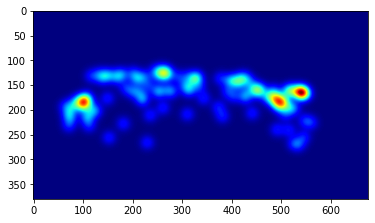

Original Image


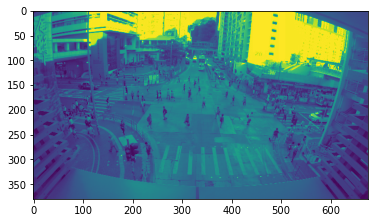

In [61]:
from matplotlib import cm as c
img = transform(Image.open('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_174.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_174.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_174.jpg'))
plt.show()

Predicted Count :  68
Original Count :  33


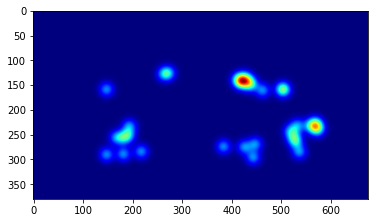

Original Image


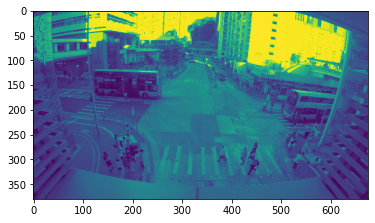

In [63]:
from matplotlib import cm as c
img = transform(Image.open('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_079.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show
temp = h5py.File('/Users/pcp25/Downloads/CityStreet_dataset/test/ground_truth/IMG_079.h5', 'r')
temp_1 = np.asarray(temp['density_maps'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/Users/pcp25/Downloads/CityStreet_dataset/test/image/IMG_079.jpg'))
plt.show()